In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
raw_data = pd.read_csv('rideshare_kaggle.csv')
raw_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
raw_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### 결측치 확인 처리

<AxesSubplot:>

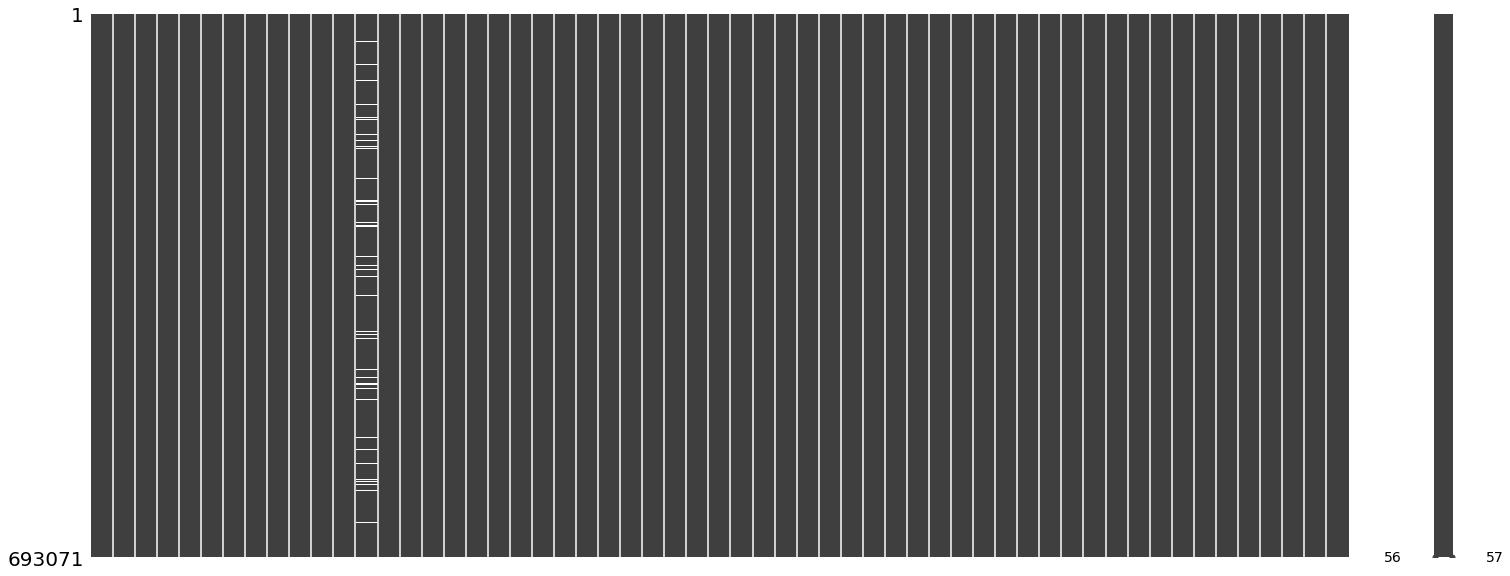

In [6]:
msno.matrix(raw_data)

In [7]:
weather_price = pd.DataFrame(raw_data, columns=['price','short_summary','temperature', 'apparentTemperature', 'pressure', 'visibility'])
weather_price.head()

,price,short_summary,temperature,apparentTemperature,pressure,visibility
0,5.0,Mostly Cloudy,42.34,37.12,1021.98,10.000
1,11.0,Rain,43.58,37.35,1003.97,4.786
2,7.0,Clear,38.33,32.93,992.28,10.000
3,26.0,Clear,34.38,29.63,1013.73,10.000
4,9.0,Partly Cloudy,37.44,30.88,998.36,10.000


In [8]:
weather_price['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [9]:
import missingno as msno

<AxesSubplot:>

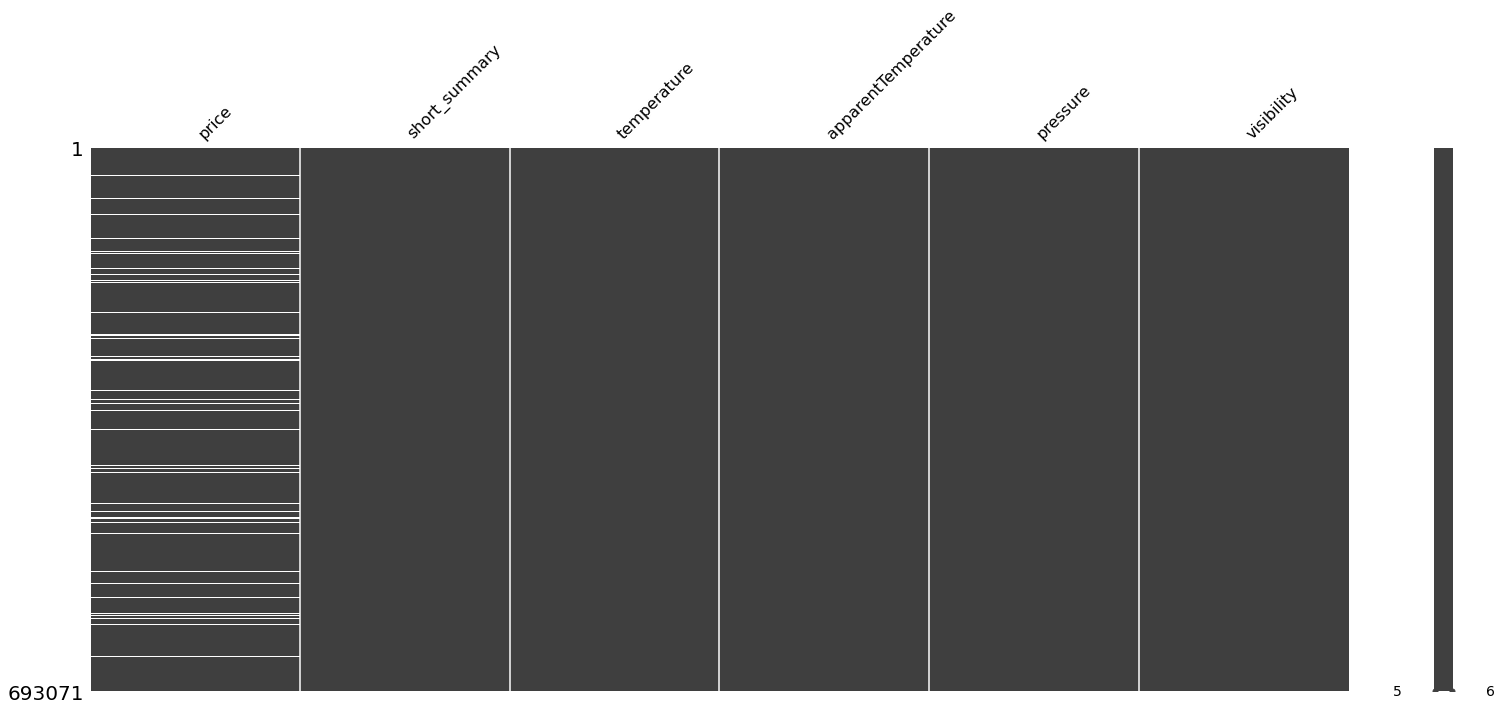

In [10]:
msno.matrix(weather_price)

In [11]:
weather_price.dropna(axis=0, inplace=True)

<AxesSubplot:>

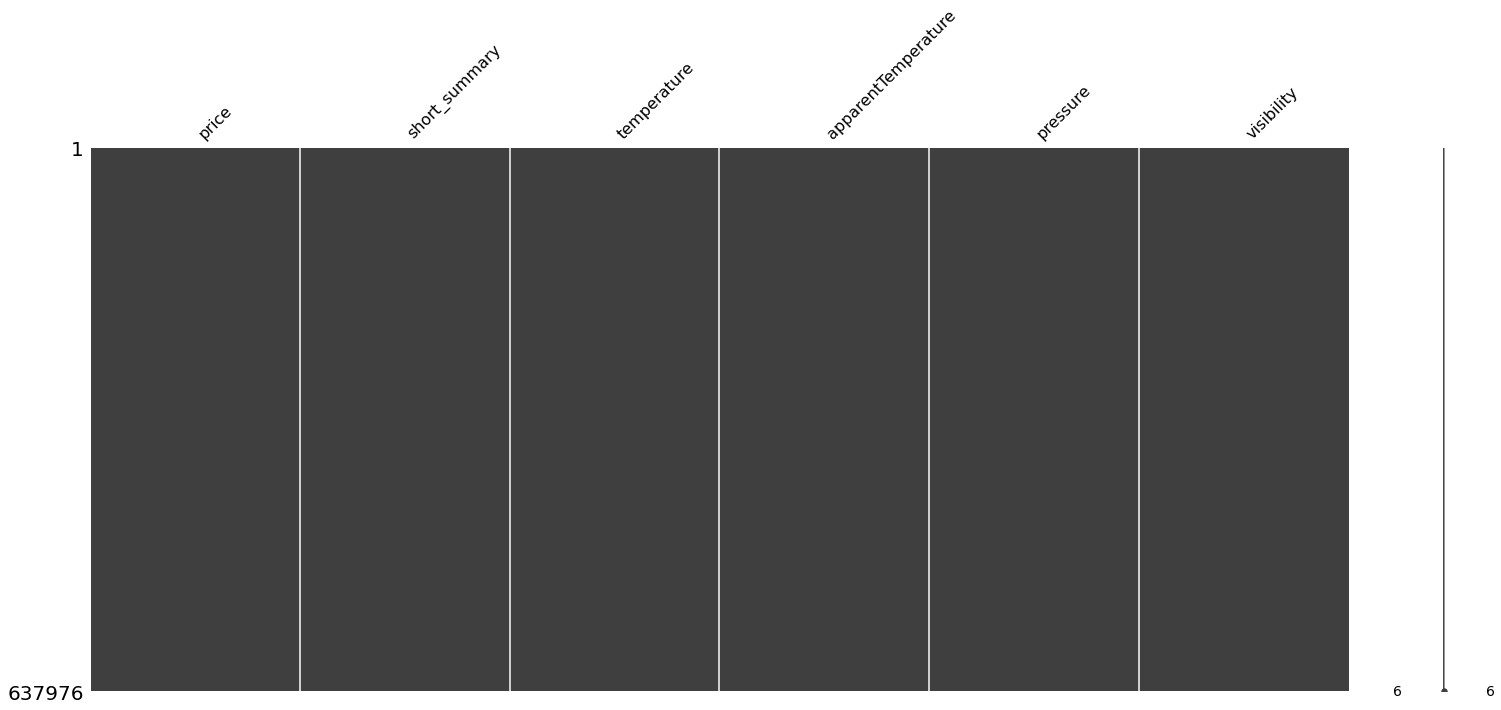

In [12]:
msno.matrix(weather_price)

In [13]:
693071-637976

55095

In [14]:
weather_price['price'].max(), weather_price['price'].min()

(97.5, 2.5)

In [15]:
weather_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                637976 non-null  float64
 1   short_summary        637976 non-null  object 
 2   temperature          637976 non-null  float64
 3   apparentTemperature  637976 non-null  float64
 4   pressure             637976 non-null  float64
 5   visibility           637976 non-null  float64
dtypes: float64(5), object(1)
memory usage: 34.1+ MB


In [16]:
len(weather_price['short_summary'].unique())

9

In [17]:
weather_price

,price,short_summary,temperature,apparentTemperature,pressure,visibility
0,5.0,Mostly Cloudy,42.34,37.12,1021.98,10.000
1,11.0,Rain,43.58,37.35,1003.97,4.786
2,7.0,Clear,38.33,32.93,992.28,10.000
3,26.0,Clear,34.38,29.63,1013.73,10.000
4,9.0,Partly Cloudy,37.44,30.88,998.36,10.000
...,...,...,...,...,...,...
693065,9.5,Partly Cloudy,37.05,37.05,1023.57,9.785
693066,13.0,Partly Cloudy,37.05,37.05,1023.57,9.785
693067,9.5,Partly Cloudy,37.05,37.05,1023.57,9.785
693069,27.0,Partly Cloudy,37.05,37.05,1023.57,9.785


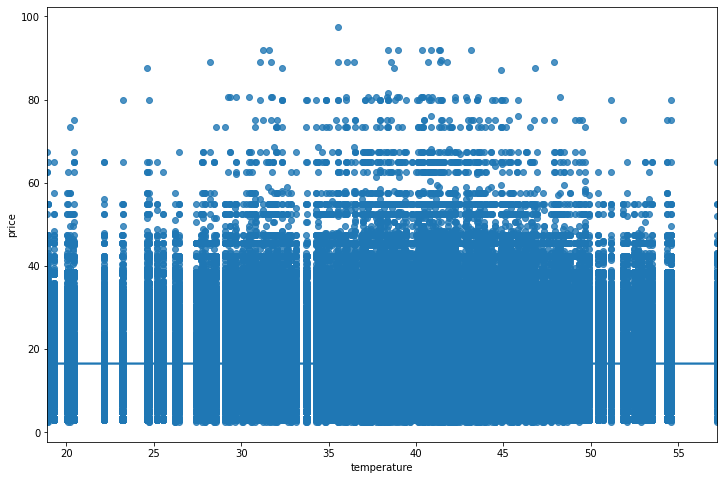

In [21]:
plt.figure(figsize=(12,8))
sns.regplot(x='temperature', y='price', data=weather_price,)
plt.show()

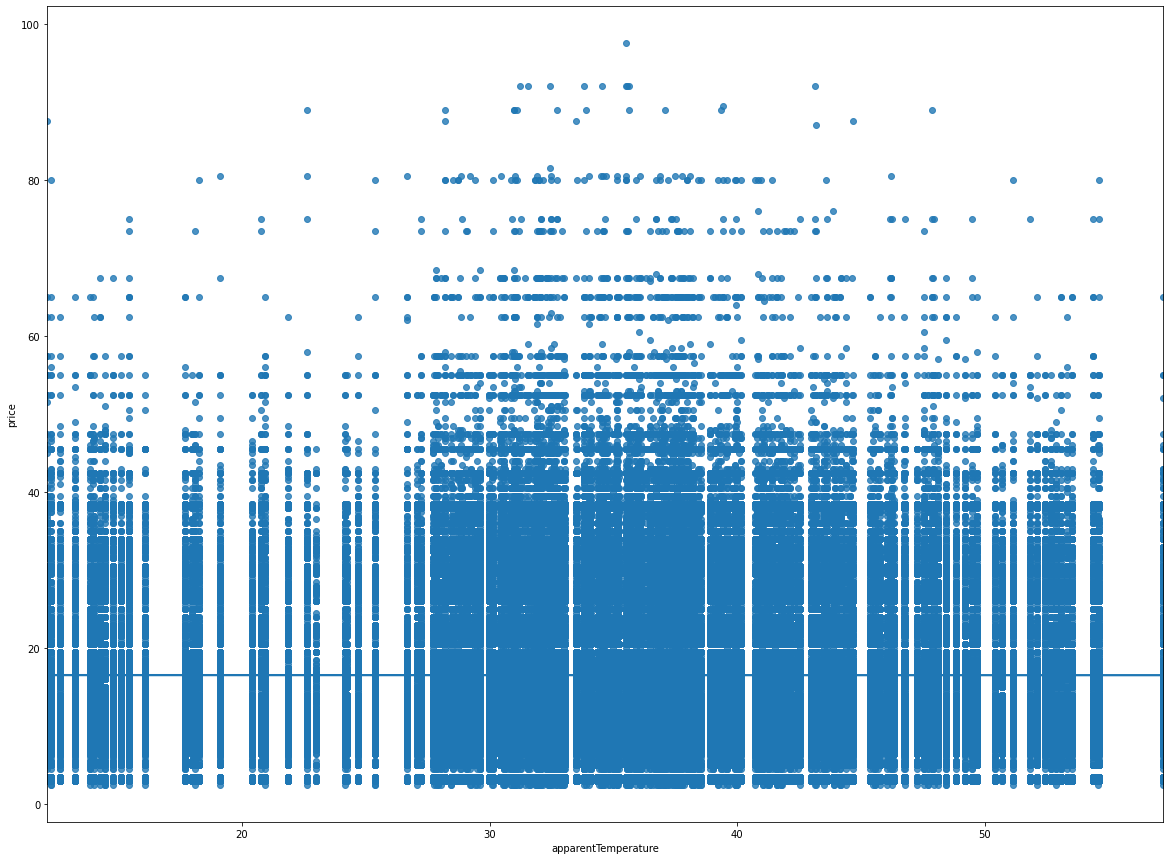

In [22]:
plt.figure(figsize=(20,15))
sns.regplot(x='apparentTemperature', y='price', data=weather_price,)
plt.show()

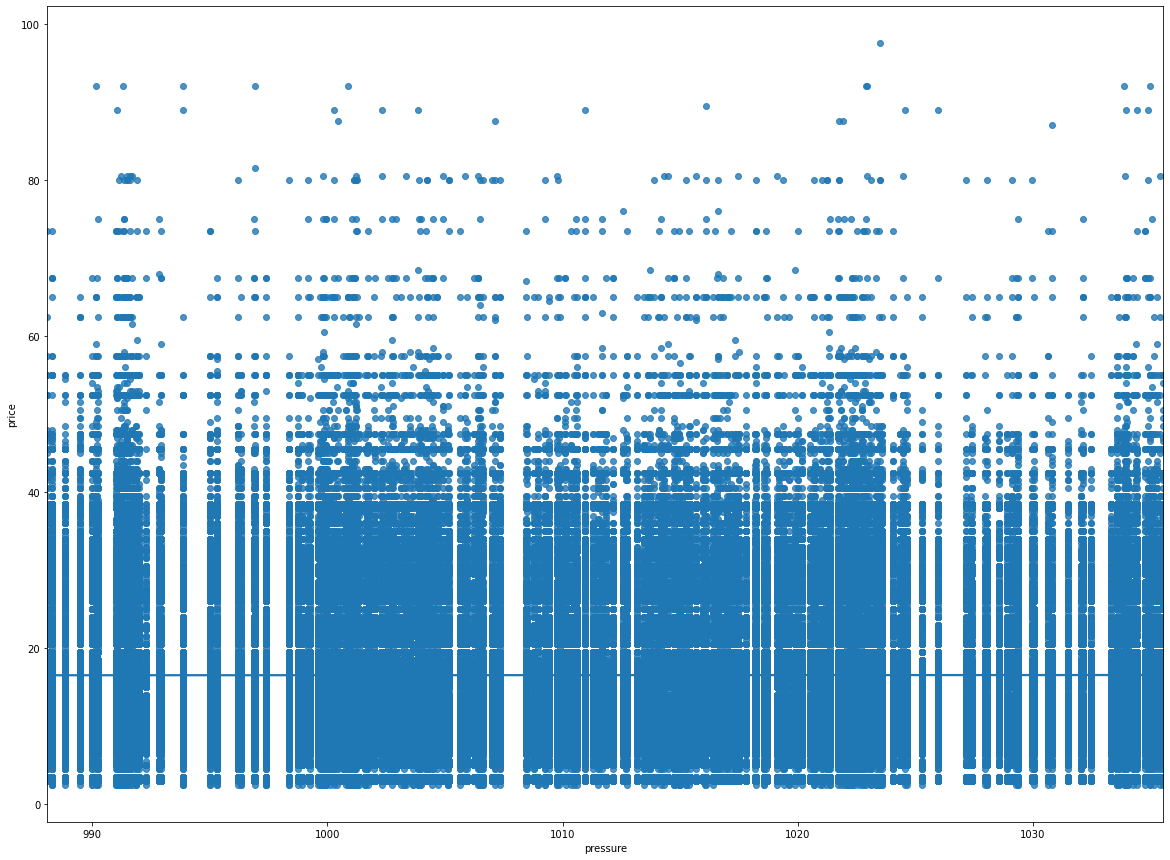

In [23]:
plt.figure(figsize=(20,15))
sns.regplot(x='pressure', y='price', data=weather_price,)
plt.show()

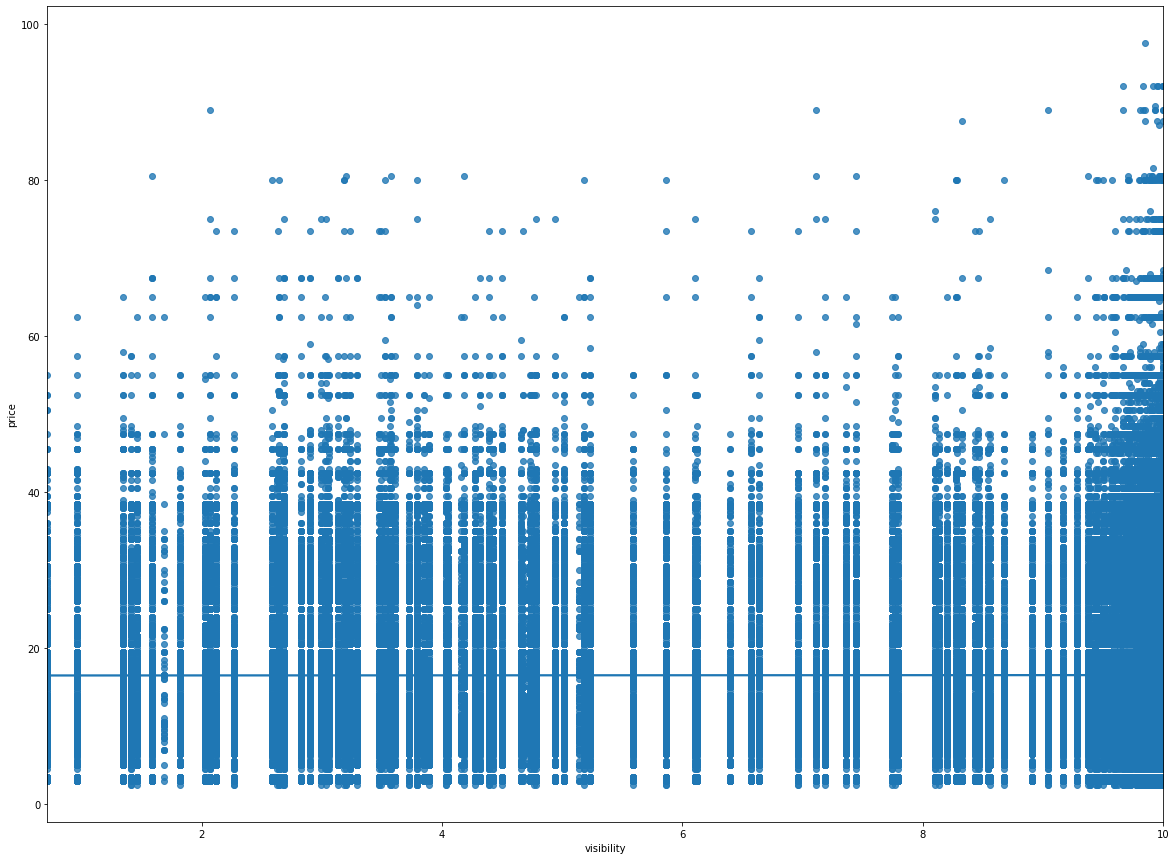

In [25]:
plt.figure(figsize=(20,15))
sns.regplot(x='visibility', y='price', data=weather_price,)
plt.show()

In [26]:
weather_price['temperature'].min(), weather_price['temperature'].max()

(18.91, 57.22)

In [27]:
weather_price['apparentTemperature'].min(), weather_price['apparentTemperature'].max()

(12.13, 57.22)

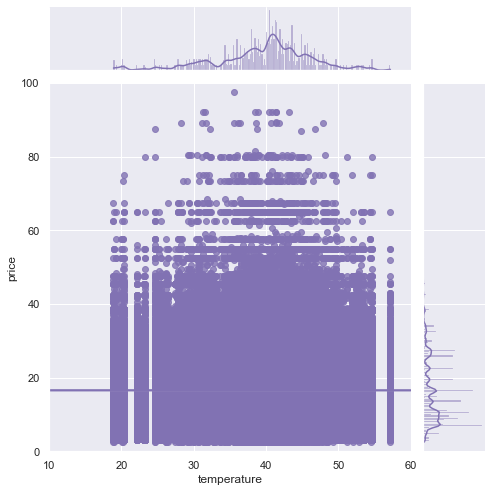

In [28]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="temperature", y="price", data=weather_price,
                  kind="reg", truncate=False,
                  xlim=(10, 60), ylim=(0, 100),
                  color="m", height=7)

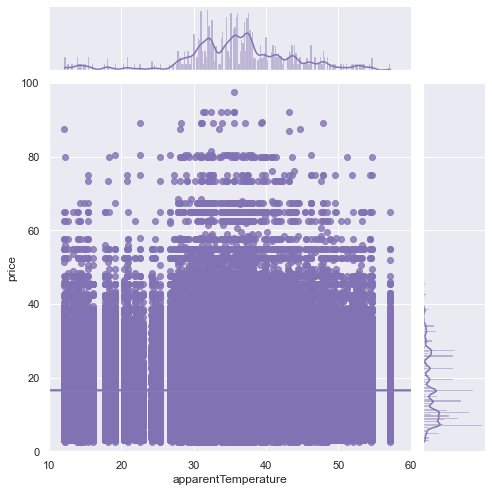

In [29]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="apparentTemperature", y="price", data=weather_price,
                  kind="reg", truncate=False,
                  xlim=(10, 60), ylim=(0, 100),
                  color="m", height=7)

<AxesSubplot:>

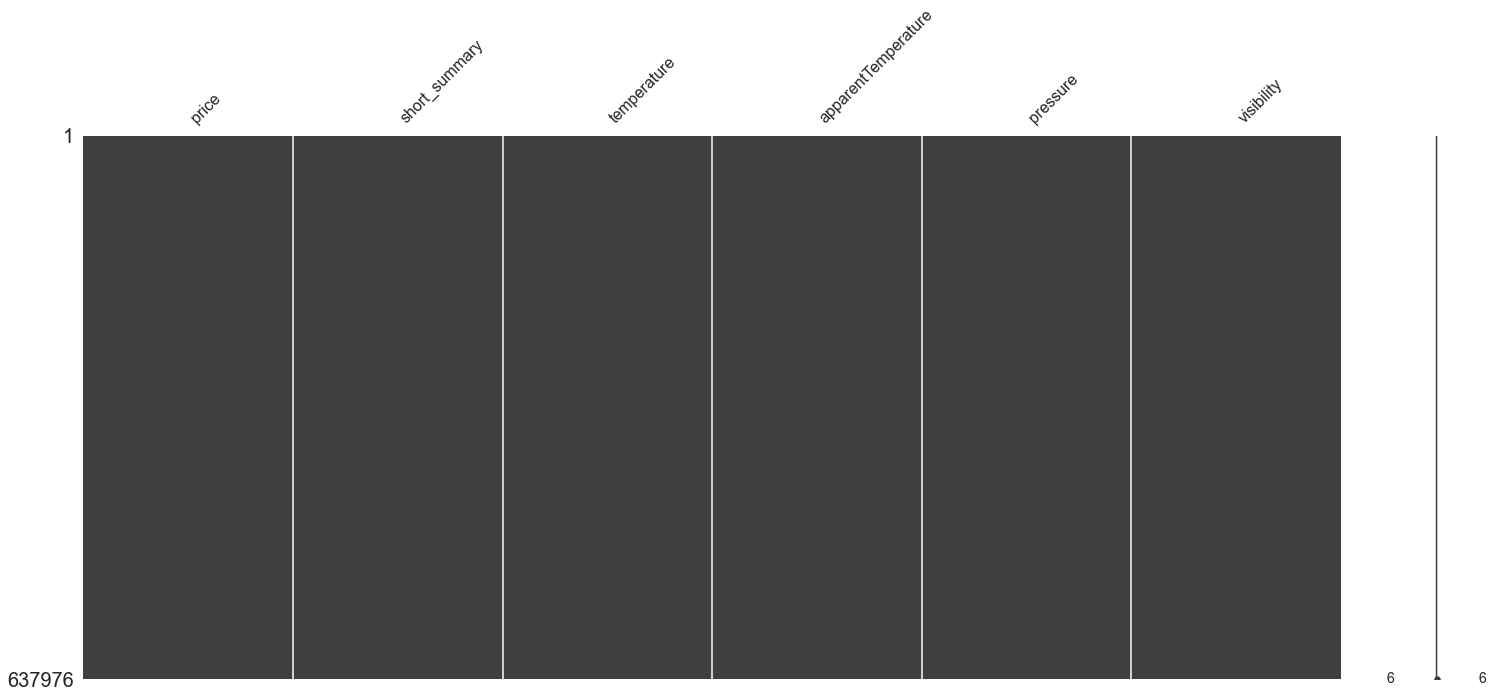

In [30]:
msno.matrix(weather_price)

In [31]:
weather_price = pd.DataFrame(raw_data, columns=[
    'price','short_summary','temperature', 'apparentTemperature',
    'pressure', 'visibility', 'humidity', 'precipIntensity',
    'precipProbability', 'windSpeed'])
weather_price.dropna(axis=0, inplace=True)
weather_price

,price,short_summary,temperature,apparentTemperature,pressure,visibility,humidity,precipIntensity,precipProbability,windSpeed
0,5.0,Mostly Cloudy,42.34,37.12,1021.98,10.000,0.68,0.0000,0.0,8.66
1,11.0,Rain,43.58,37.35,1003.97,4.786,0.94,0.1299,1.0,11.98
2,7.0,Clear,38.33,32.93,992.28,10.000,0.75,0.0000,0.0,7.33
3,26.0,Clear,34.38,29.63,1013.73,10.000,0.73,0.0000,0.0,5.28
4,9.0,Partly Cloudy,37.44,30.88,998.36,10.000,0.70,0.0000,0.0,9.14
...,...,...,...,...,...,...,...,...,...,...
693065,9.5,Partly Cloudy,37.05,37.05,1023.57,9.785,0.74,0.0000,0.0,2.34
693066,13.0,Partly Cloudy,37.05,37.05,1023.57,9.785,0.74,0.0000,0.0,2.34
693067,9.5,Partly Cloudy,37.05,37.05,1023.57,9.785,0.74,0.0000,0.0,2.34
693069,27.0,Partly Cloudy,37.05,37.05,1023.57,9.785,0.74,0.0000,0.0,2.34


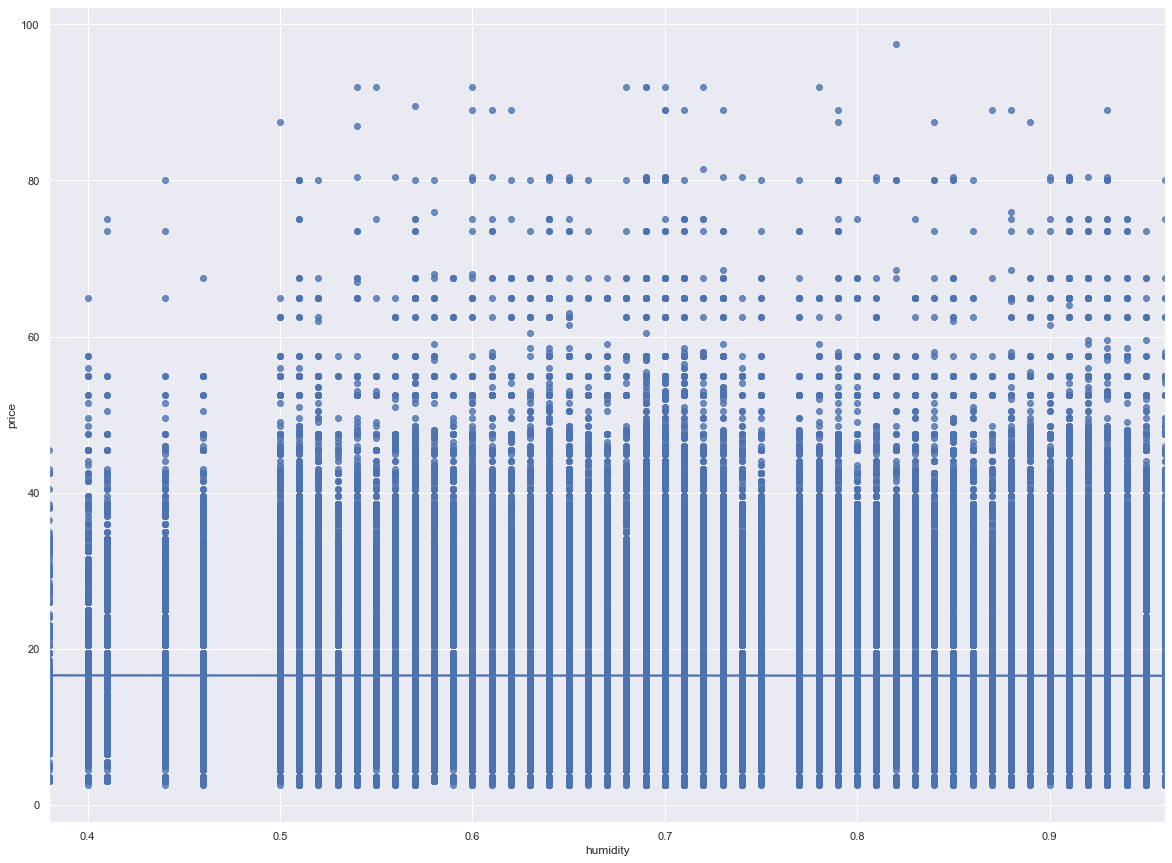

In [32]:
plt.figure(figsize=(20,15))
sns.regplot(x='humidity', y='price', data=weather_price,)
plt.show()

In [33]:
weather_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                637976 non-null  float64
 1   short_summary        637976 non-null  object 
 2   temperature          637976 non-null  float64
 3   apparentTemperature  637976 non-null  float64
 4   pressure             637976 non-null  float64
 5   visibility           637976 non-null  float64
 6   humidity             637976 non-null  float64
 7   precipIntensity      637976 non-null  float64
 8   precipProbability    637976 non-null  float64
 9   windSpeed            637976 non-null  float64
dtypes: float64(9), object(1)
memory usage: 53.5+ MB


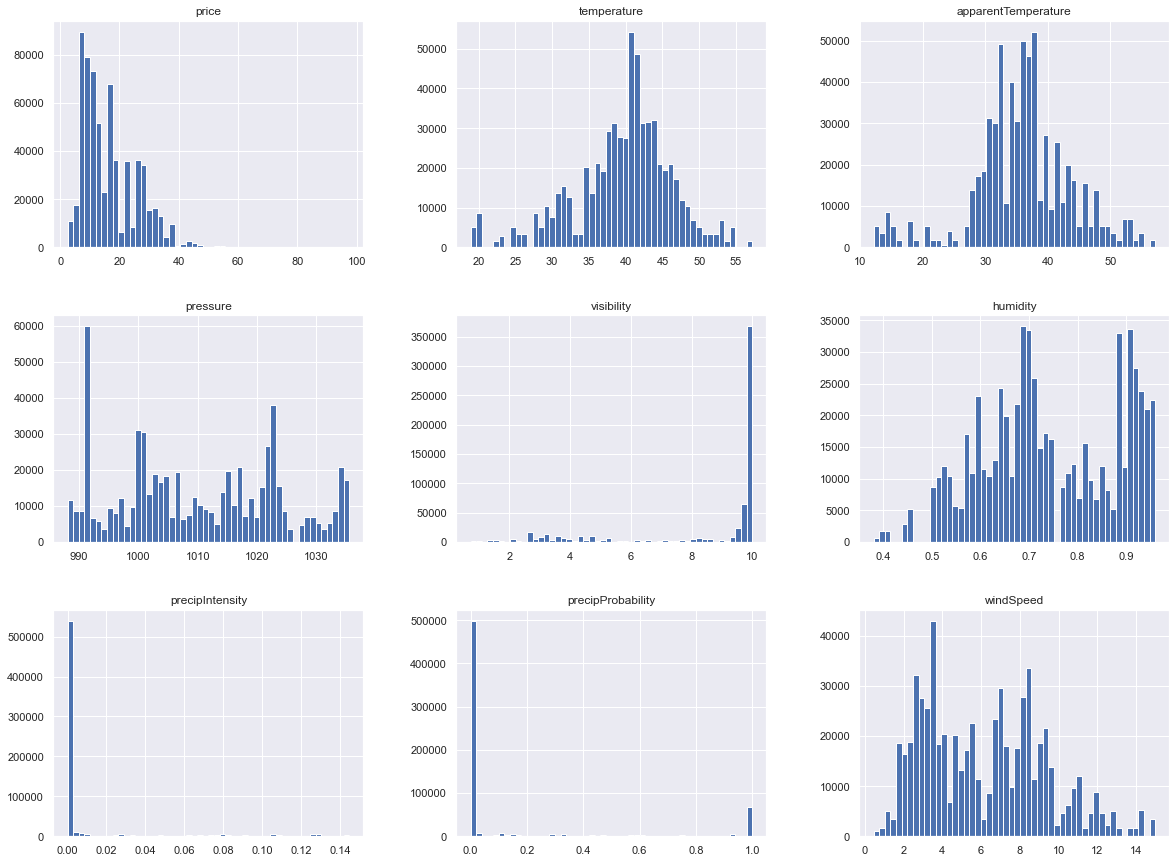

In [34]:
weather_price.hist(bins=50, figsize=(20,15))
plt.show()


In [35]:
dum_df = pd.get_dummies(weather_price, columns=['short_summary'])
dum_df.head()

,price,temperature,apparentTemperature,pressure,visibility,humidity,precipIntensity,precipProbability,windSpeed,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,42.34,37.12,1021.98,10.000,0.68,0.0000,0.0,8.66,0,0,0,0,1,0,0,0,0
1,11.0,43.58,37.35,1003.97,4.786,0.94,0.1299,1.0,11.98,0,0,0,0,0,0,0,0,1
2,7.0,38.33,32.93,992.28,10.000,0.75,0.0000,0.0,7.33,1,0,0,0,0,0,0,0,0
3,26.0,34.38,29.63,1013.73,10.000,0.73,0.0000,0.0,5.28,1,0,0,0,0,0,0,0,0
4,9.0,37.44,30.88,998.36,10.000,0.70,0.0000,0.0,9.14,0,0,0,0,0,0,1,0,0


In [36]:
dum_df.columns

Index(['price', 'temperature', 'apparentTemperature', 'pressure', 'visibility',
       'humidity', 'precipIntensity', 'precipProbability', 'windSpeed',
       'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain '],
      dtype='object')

In [37]:
countplot, scatterplot 체감기온과 실제기온과의 관계


SyntaxError: invalid syntax (<ipython-input-37-75aa9fa5e453>, line 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


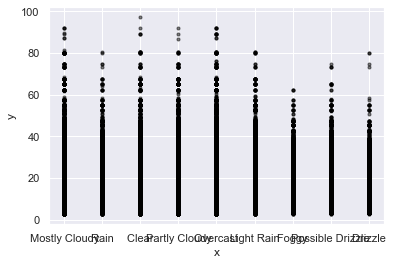

In [38]:
x = weather_price['short_summary']
y = weather_price['price']
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

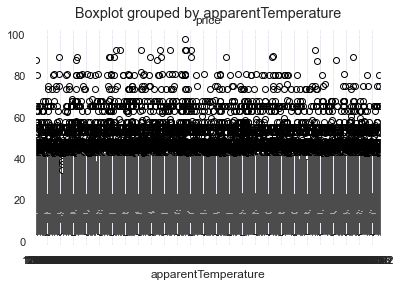

In [39]:
weather_price.boxplot('price','apparentTemperature')
plt.show()


In [40]:
x = dum_df[['short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ']]
y = dum_df['price']


In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)
reg.score(x,y)

9.580246051577035e-06

In [42]:
reg.coef_


array([-5.5790585e+09, -5.5790585e+09, -5.5790585e+09, -5.5790585e+09,
       -5.5790585e+09, -5.5790585e+09, -5.5790585e+09, -5.5790585e+09,
       -5.5790585e+09])

In [43]:
reg.intercept_


5579058518.240475

In [44]:
import statsmodels.api as sm


In [45]:
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.043
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.401
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637967   BIC:                         4.659e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
short_su

In [46]:

x1 = dum_df['windSpeed']
x1 = sm.add_constant(x1)
x2 = dum_df['apparentTemperature']
x2 = sm.add_constant(x2)
x3 = dum_df['temperature']
x3 = sm.add_constant(x3)
x4 = dum_df['humidity']
x4 = sm.add_constant(x4)
x5 = dum_df['precipIntensity']
x5 = sm.add_constant(x5)
x6 = dum_df['precipProbability']
x6 = sm.add_constant(x6)
x7 = dum_df['pressure']
x7 = sm.add_constant(x7)
x8 = dum_df['visibility']
x8 = sm.add_constant(x8)

y = dum_df['price']


In [47]:
model = sm.OLS(y, x1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6250
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.429
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5270      0.026    641.998      0.0

In [48]:
model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02368
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.878
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.5533    

In [49]:
model = sm.OLS(y,x3)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004521
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.946
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.5497      0.070    237.474      

In [50]:
model = sm.OLS(y,x4)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9776
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.323
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6069      0.064    261.481      0.0

In [51]:
model = sm.OLS(y,x5)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01760
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.894
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.5446      0.012   13

In [52]:
model = sm.OLS(y,x6)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03754
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.846
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.5461      0.01

In [53]:
model = sm.OLS(y,x7)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4780
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.489
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9402      0.875     18.215      0.0

In [54]:
model = sm.OLS(y,x8)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.429
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.232
Time:                        21:42:17   Log-Likelihood:            -2.3296e+06
No. Observations:              637976   AIC:                         4.659e+06
Df Residuals:                  637974   BIC:                         4.659e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4997      0.040    415.062      0.0

### scaling

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

In [56]:
dum_df.columns

Index(['price', 'temperature', 'apparentTemperature', 'pressure', 'visibility',
       'humidity', 'precipIntensity', 'precipProbability', 'windSpeed',
       'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain '],
      dtype='object')

In [57]:
tem_df = dum_df[['price', 'temperature']]
tem_df.head()

,price,temperature
0,5.0,42.34
1,11.0,43.58
2,7.0,38.33
3,26.0,34.38
4,9.0,37.44


In [58]:
tem_df['tem_minmax'] = mm.fit_transform(tem_df[['temperature']])
tem_df['tem_standard'] = ss.fit_transform(tem_df[['temperature']])
tem_df['tem_robust'] = rs.fit_transform(tem_df[['temperature']])
tem_df.head()

<ipython-input-58-1a5f6b6c79f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-1a5f6b6c79f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-1a5f6b6c79f1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,price,temperature,tem_minmax,tem_standard,tem_robust
0,5.0,42.34,0.611590,0.410021,0.259467
1,11.0,43.58,0.643957,0.594394,0.433380
2,7.0,38.33,0.506917,-0.186218,-0.302945
3,26.0,34.38,0.403811,-0.773535,-0.856942
4,9.0,37.44,0.483686,-0.318550,-0.427770


In [59]:
# column : temperature

x1 = tem_df['tem_minmax']
x2 = tem_df['tem_standard']
x3 = tem_df['tem_robust']

y = tem_df['price']

In [60]:
model = sm.OLS(y,x1)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                          1.396e+06
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:42:18   Log-Likelihood:                     -2.4137e+06
No. Observations:              637976   AIC:                                  4.827e+06
Df Residuals:                  637975   BIC:                                  4.827e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                           0.001090
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                       0.974
Time:                        21:42:18   Log-Likelihood:                     -2.7835e+06
No. Observations:              637976   AIC:                                  5.567e+06
Df Residuals:                  637975   BIC:                                  5.567e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [62]:
model = sm.OLS(y,x3)

result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              8785.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:42:18   Log-Likelihood:                     -2.7791e+06
No. Observations:              637976   AIC:                                  5.558e+06
Df Residuals:                  637975   BIC:                                  5.558e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
dum_df.columns

Index(['price', 'temperature', 'apparentTemperature', 'pressure', 'visibility',
       'humidity', 'precipIntensity', 'precipProbability', 'windSpeed',
       'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain '],
      dtype='object')

In [64]:
dum_df.drop(axis=1, columns=['temperature', 'apparentTemperature', 'pressure', 'visibility',
                            'humidity', 'precipIntensity', 'precipProbability', 'windSpeed'], inplace=True)

dum_df.columns

Index(['price', 'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain '],
      dtype='object')

In [65]:
len(dum_df.columns)

10

In [66]:
dum_df.tail()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
693065,9.5,0,0,0,0,0,0,1,0,0
693066,13.0,0,0,0,0,0,0,1,0,0
693067,9.5,0,0,0,0,0,0,1,0,0
693069,27.0,0,0,0,0,0,0,1,0,0
693070,10.0,0,0,0,0,0,0,1,0,0


In [ ]:
inverse_trans_form : 성능확인후 데이터를 다시 복원하여 성능 확인
    
    
거리 날씨 밖에 없음
거리 편차 적음
->> regression이 어려운 데이터

사람이 판정 참값과 예측값을 그리기

특정 값을 linear regression 할것을 추천

ols는 행렬적으로 접근해야됨
아이젠밸류 행과열이 같아야됨

빅데이터용 판다스 한번에 데이터를 불러올수 없음
빅데이터를 다룰때 어떻게하면 for문을 안 쓸지 고민 많이 함 (lambda, numpy 위주 사용 추천)

In [ ]:
예측할 데이터와 큰 상관관계를 가지는 데이터에 결측치가 있을 경우